## Preprocessing the datasets

In this Jupyter Notebook, we will preprocess and cluster the German Credit Risk dataset.
This dataset is obtained from:
- https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29
And largely follows the preprocessing from:
https://www.kaggle.com/kabure/german-credit-data-with-risk

In [75]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 1. Importing the dataset

In [76]:
#Importing the data
df_credit = pd.read_csv("C:\\Users\\Gebruiker\\Documents\\thesiscode\\experimental\datasets\german_credit_data_target\german_credit_data.csv", index_col=0)

df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## 2. Data Exploration 

In [77]:
# Missing values, type of data, shape of data
df_credit.info()
# Most missing values in "saving accounts" and "checking account" attributes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 62.5+ KB


In [78]:
# Statistics of dataset
df_credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [5]:
# Number of unique values
df_credit.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

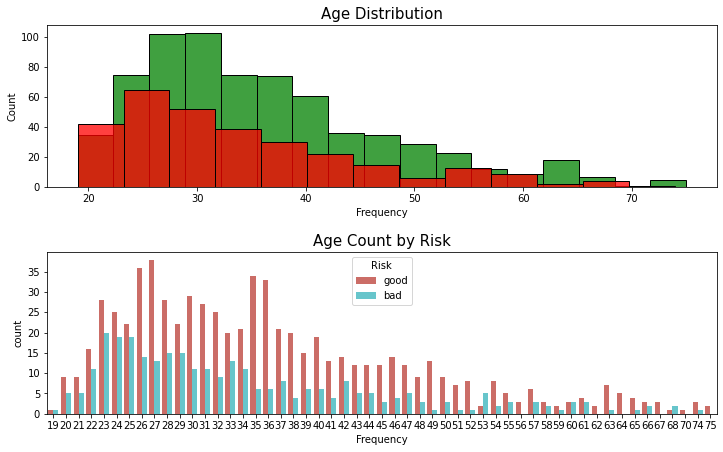

In [80]:
# Matplotlib graphs: depends on which attributes may seem sensitive
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.histplot(df_good["Age"], ax=ax[0], 
             color="green")
g1 = sns.histplot(df_bad["Age"], ax=ax[0], 
             color='red')
g1.set_title("Age Distribution", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Count by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Frequency")
plt.show()

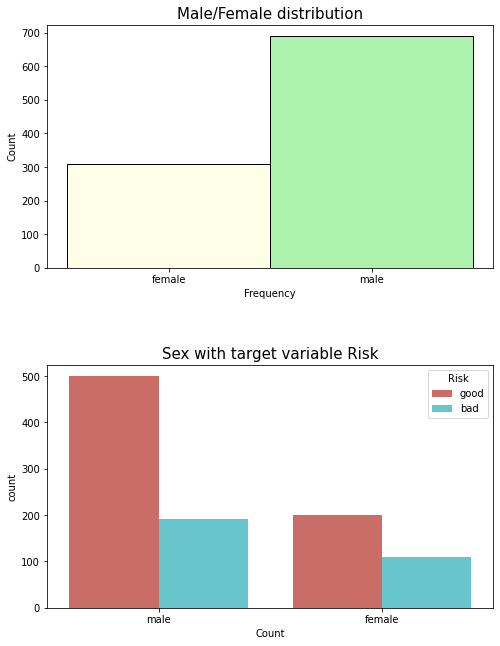

In [81]:
df_male = df_credit[df_credit["Sex"] == 'male']
df_female = df_credit[df_credit["Sex"] == 'female']

fig, ax = plt.subplots(nrows=2, figsize=(8,12))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.histplot(df_female["Sex"], ax=ax[0], 
             color="lightyellow")
g1 = sns.histplot(df_male["Sex"], ax=ax[0], 
             color='lightgreen')
g1.set_title("Male/Female distribution", fontsize=15)
g1.set_xlabel("Sex")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Sex",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Sex with target variable Risk", fontsize=15)
g2.set_xlabel("Sex")
g2.set_xlabel("Count")
plt.show()

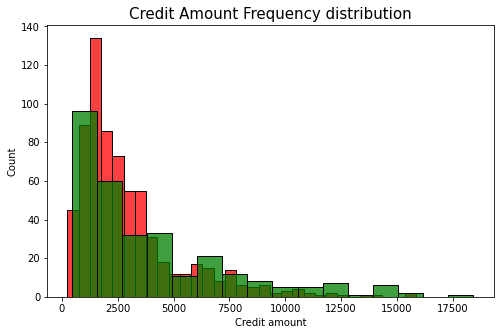

In [82]:
# Investigating the credit amount
plt.figure(figsize = (8,5))

g= sns.histplot(df_good['Credit amount'], color='r')
g = sns.histplot(df_bad['Credit amount'], color='g')
g.set_title("Credit Amount Frequency distribution", fontsize=15)
plt.show()

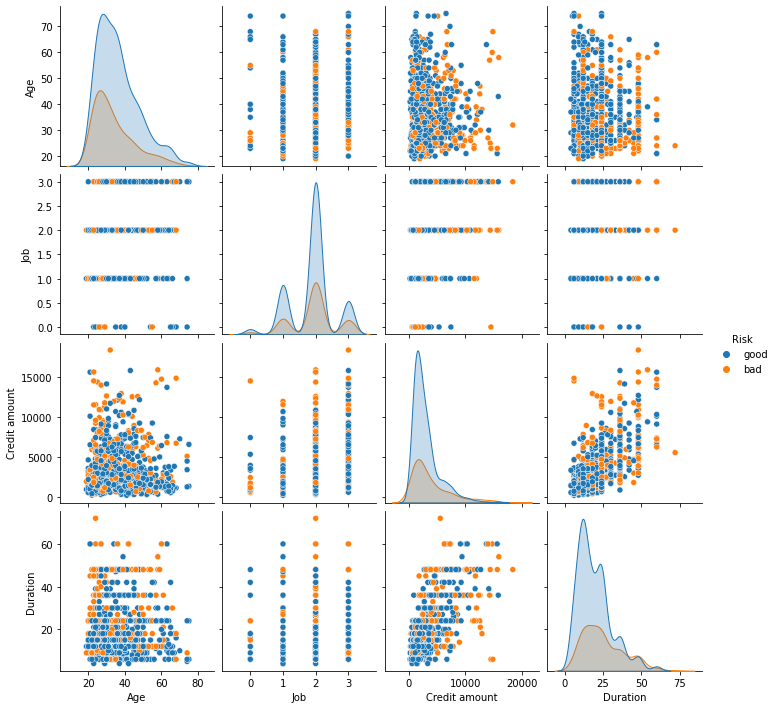

In [83]:
# Plotting with Seaborn
X = df_credit[['Age','Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk']]
sns.pairplot(X, hue="Risk")

<AxesSubplot:>

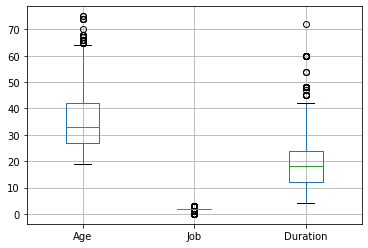

In [84]:
# Is this useful?

df_credit.boxplot(column=['Age', 'Job', 'Duration'])

In [85]:
pd.crosstab(df_credit.Purpose, df_credit.Risk)

Risk,bad,good
Purpose,,
business,34,63
car,106,231
domestic appliances,4,8
education,23,36
furniture/equipment,58,123
radio/TV,62,218
repairs,8,14
vacation/others,5,7


Text(0.5, 1.0, 'Purposes per risk class')

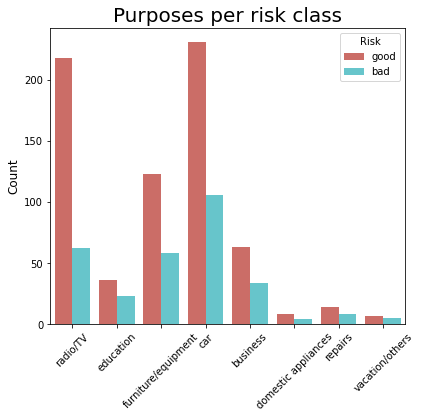

In [86]:
plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df_credit, 
              palette="hls", hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes per risk class", fontsize=20)

In [87]:
# Creating a categorical variable to handle with the age variable

#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)
cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


In [88]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [89]:
print("Purpose : ",df_credit.Purpose.unique())
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Age_cat : ",df_credit['Age_cat'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']
Age_cat :  ['Senior', 'Student', 'Adult', 'Young']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


## Data Preprocessing

Encoding the categorical features into dummies

In [90]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [91]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [92]:
# Deleting the old features

#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

In [99]:
df_credit

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Savings_no_inf,Savings_quite rich,Savings_rich,Risk_bad,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,67,2,1169,6,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,22,2,5951,48,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,49,1,2096,12,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,45,2,7882,42,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,53,2,4870,24,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
996,40,3,3857,30,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
997,38,2,804,12,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
998,23,2,1845,45,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


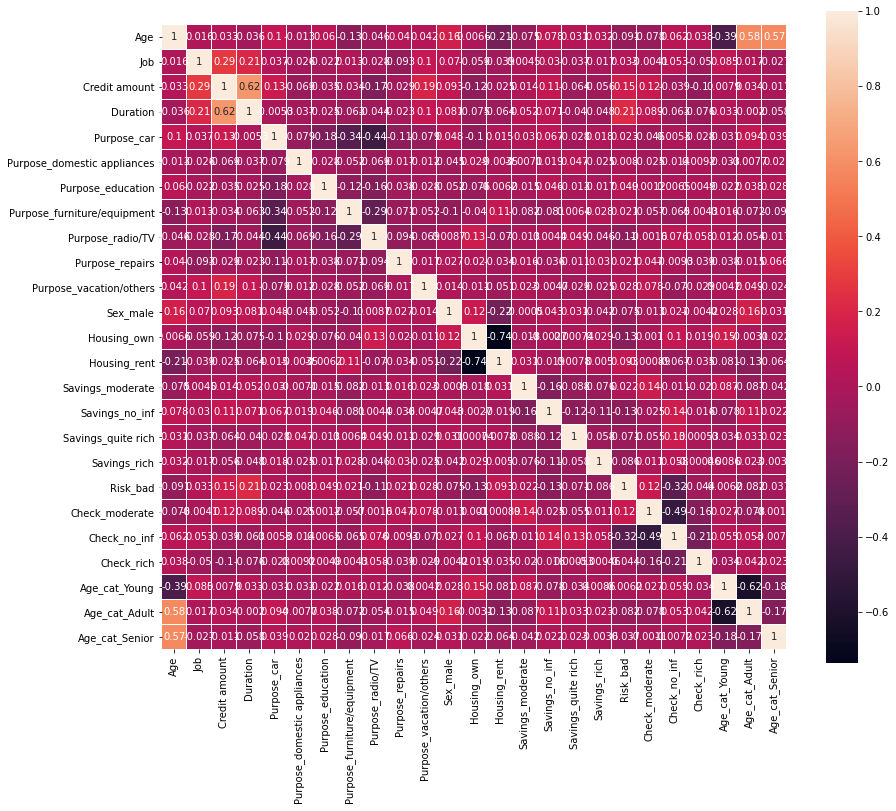

In [94]:
# Observing data correlation
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [70]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [101]:
X = df_credit.drop('Risk_bad', 1)
y = df_credit['Risk_bad']

# Splitting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)


,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Savings_moderate,Savings_no_inf,Savings_quite rich,Savings_rich,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,67,2,1169,6,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,22,2,5951,48,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,49,1,2096,12,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,45,2,7882,42,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,53,2,4870,24,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
996,40,3,3857,30,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
997,38,2,804,12,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
998,23,2,1845,45,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
# Training a RandomForest Classifier 
# model = RandomForestClassifier()
model = RandomForestClassifier()
model.fit(X_train, y_train.values.ravel())

# Obtaining predictions
y_hat = model.predict(X_test)

In [108]:

# Converting y_hat from Np to DF
predictions_col = pd.DataFrame()
predictions_col['predicted_class'] = y_hat.tolist()
predictions_col['true_class'] = y_test

# Calculating the errors with the absolute value 
predictions_col['errors'] = abs(predictions_col['predicted_class'] - predictions_col['true_class'])

# Rescaling the prediction errors with max error value of 1
# It doesn't matter whether the misclassification is between class 0 and 2 or between 0 and 1, it has the same error value. 
predictions_col['errors'] = predictions_col['errors'].replace(2.0, 1.0)

# Adding predictions to test data
entire_dataset = pd.merge(X_test, predictions_col, left_index = True, right_index = True)
errors = entire_dataset['errors']
df_out = entire_dataset.drop(['predicted_class', 'true_class', 'errors'], axis=1)

# The dataset
entire_dataset

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Savings_rich,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior,predicted_class,true_class,errors
136,27,2,8613,27,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0.0,0.0
76,34,2,3965,42,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1.0,1.0
280,23,2,3368,15,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0.0,0.0
319,27,1,3643,15,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0.0,0.0
174,26,2,3414,21,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,27,1,2708,15,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0.0,0.0
185,31,2,1360,15,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0.0,0.0
41,26,2,1158,12,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0.0,0.0
108,30,2,7721,24,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0.0,0.0


In [107]:
df_out.to_csv('credit_df_out.csv')